This notebook processes the UV-vis data from 8/22/24 (Batch 4) and 9/10/24 (Batch 6) of Airbrusehd P3HT in Toluene on PDMS.

Note there is no unpolarized data for 8/22/24 (Batch 4)

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_polarized_UVvis(_df, bw=None, ylim=(0,1.05),title="", plot_transmittance = False):
    # Set up figure with 3 subplots for polarized and unpolarized UV-vis data
    fig, axs = plt.subplots(3, 1, figsize=(5, 10))
    fig.suptitle(title, fontsize=16, fontweight='bold')

    if plot_transmittance:
        for i, column in enumerate([col for col in _df.columns if 'Wavelength' not in col]):
            print(column)
            _df[column] = AtoT(_df[column].values)
        _df
    # Generate colors for plotting
    colors = cm.Spectral([i / len([col for col in _df.columns if 'V' in col and 'baseline' not in col]) for i in range((_df.shape[1] - 1)//3)])
    # Plot Horizontal Absorbance (columns with 'H' wichic are parrallel to strain)
    for i, column in enumerate([col for col in _df.columns if 'H' in col and 'baseline' not in col]):
        axs[0].plot(_df['Wavelength'],_df[column], label=column, color=colors[i])

    # axs[0].set_title(f'{'Transmittance' if plot_transmittance else 'Absorbance'} vs. Wavelength for ||-polarized light')
    axs[0].set_xlabel('Wavelength (nm)')
    axs[0].set_ylabel(f'{'Transmittance' if plot_transmittance else 'Absorbance'}')
    axs[0].set_xlim(bw)
    axs[0].set_ylim(ylim)
    axs[0].legend(title='||-Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot Vertical Absorbance (columns with 'V' which are perp to strain)
    for i, column in enumerate([col for col in _df.columns if 'V' in col and 'baseline' not in col]):
        axs[1].plot(_df['Wavelength'],_df[column], label=column, color=colors[i])

    # axs[1].set_title(f'{'Transmittance' if plot_transmittance else 'Absorbance'} vs. Wavelength for ⊥-polarized light')
    axs[1].set_xlabel('Wavelength (nm)')
    axs[1].set_ylabel(f'{'Transmittance' if plot_transmittance else 'Absorbance'}')
    axs[1].set_xlim(bw)
    axs[1].set_ylim(ylim)
    axs[1].legend(title='⊥-Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot Unpolarized Absorbance (columns without 'H' or 'V')
    
    for i, column in enumerate([col for col in _df.columns if 'H' not in col and 'V' not in col and 'Wavelength' not in col and 'baseline' not in col]):
        if column is not None:
            axs[2].plot(_df['Wavelength'], _df[column], label=column, color=colors[i])

    # axs[2].set_title(f'{'Transmittance' if plot_transmittance else 'Absorbance'} vs. Wavelength for Unpolarized light')
    axs[2].set_xlabel('Wavelength (nm)')
    axs[2].set_ylabel(f'{'Transmittance' if plot_transmittance else 'Absorbance'}')
    axs[2].set_xlim(bw)
    axs[2].set_ylim(ylim)
    axs[2].legend(title='Unpolarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    
    return fig,axs

def TtoA(T):
    return -np.log10(T) 
    
def AtoT(A):
    return 10**(-A)

In [107]:

# Load the CSV file into a pandas DataFrame, with metadata
sample_info = [
    {
        'file_path': ['Batch 6 6 - Sample 1 Unpolarized Data 9-10-24.csv',
                    'Batch 6 6 - Sample 1 Horizontal Data 9-10-24.csv',
                    'Batch 6 6 - Sample 1 Vertical Data  9-10-24.csv'],
        's_num': 1,
        'date_str': "2024-9-10",
        'method_str': "airbrushed",
        'material_str': 'P3HT',
        'solvent_str': 'Toluene'
    },
    {
        'file_path': ['/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Unpolarized 1.csv',
                    '/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Horizontal 1.csv',
                    '/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Vertical 1.csv'],
        's_num': 2,
        'date_str': "08-22-24",
        'method_str': "airbrushed",
        'material_str': 'P3HT',
        'solvent_str': 'Toluene'
    },
    {
        'file_path': ['/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Unpolarized 2.csv',
                    '/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Horizontal 2.csv',
                    '/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Vertical 2.csv'],
        's_num': 3,
        'date_str': "08-22-24",
        'method_str': "airbrushed",
        'material_str': 'P3HT',
        'solvent_str': 'Toluene'
    }
]

i=2
file_path = sample_info[i]['file_path']
s_num = sample_info[i]['s_num']
date_str = sample_info[i]['date_str']
method_str = sample_info[i]['method_str']
material_str = sample_info[i]['material_str']
solvent_str = sample_info[i]['solvent_str']
print(f"File Path: {file_path}\n Sample Number: {s_num}\n Date: {date_str}\n Method: {method_str}")

# file_path = 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 5 Raw Data.csv'; s_num = 5; date_str = "2024-09-08"; method_str="spincoated"
# # file_path = 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 6 Raw Data.csv'; s_num = 6; date_str = "2024-09-08"; method_str="spincoated"

dfU = pd.read_csv(file_path[0]) if file_path[0] != '' else pd.DataFrame({'Wavelength': np.arange(300, 900.5, 0.5)})
dfH = pd.read_csv(file_path[1])
dfV = pd.read_csv(file_path[2])

if file_path[0] == '':
    dfH.columns = ['Wavelength'] + [col + 'H' for col in dfH.columns[1:]]
    dfV.columns = ['Wavelength'] + [col + 'V' for col in dfV.columns[1:]]

raw_df = dfU.merge(dfH, on='Wavelength', suffixes=('', 'H'))
raw_df = raw_df.merge(dfV, on='Wavelength', suffixes=('', 'V'))





raw_df


File Path: ['/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Unpolarized 2.csv', '/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Horizontal 2.csv', '/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Vertical 2.csv']
 Sample Number: 3
 Date: 08-22-24
 Method: airbrushed


,Wavelength,0%,10%,20%,30%,40%,50%,60%,70%,80%,...,10%V,20%V,30%V,40%V,50%V,60%V,70%V,80%V,90%V,100%V
0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.978793,3.932287,4.000000,3.978861,3.956074,3.894594,4.000000,3.447410,4.000000,1.694899
1,300.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.978679,3.989369,3.978762,3.936801,3.928313,4.000000,3.958553,3.535813,3.933316,3.301173
2,301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,4.000000,4.000000,3.935007,3.783425,3.943317,3.825638,3.670824,3.604818,3.383515
3,301.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.933754,4.000000,3.961009,3.953425,3.948937,4.000000,3.878735,3.648212,3.862157,1.968955
4,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,4.000000,3.994198,3.963797,3.939722,3.978176,3.860827,3.594193,3.716502,3.656153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.335942,0.338672,0.334237,0.325871,0.319920,0.315916,0.316878,0.312623,-1.107606,-3.879478
1197,898.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.334384,0.337180,0.332708,0.324380,0.318392,0.314444,0.315287,0.310358,-1.109471,-3.896103
1198,899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.333314,0.336080,0.331636,0.323269,0.317392,0.313412,0.314212,0.308648,-1.110500,-3.867527
1199,899.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.331775,0.334515,0.330076,0.321775,0.315852,0.311982,0.312789,0.307093,-1.111684,-3.901764


In [108]:
### load baseline data for polaizer  ####
h_file = "../baselines/Polarized Batch 4 0% Samples  - Baseline Horizontal.csv"
v_file = "../baselines/Polarized Batch 4 0% Samples  - Baseline Vertical.csv"

df_h = pd.read_csv(h_file)
df_v = pd.read_csv(v_file)

#add baseleine to df
raw_df['V_baseline'] = df_v['Average']
raw_df['H_baseline'] = df_h['Average']

raw_df

,Wavelength,0%,10%,20%,30%,40%,50%,60%,70%,80%,...,30%V,40%V,50%V,60%V,70%V,80%V,90%V,100%V,V_baseline,H_baseline
0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,3.978861,3.956074,3.894594,4.000000,3.447410,4.000000,1.694899,4.000000,4.000000
1,300.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.978762,3.936801,3.928313,4.000000,3.958553,3.535813,3.933316,3.301173,3.973701,4.000000
2,301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,3.935007,3.783425,3.943317,3.825638,3.670824,3.604818,3.383515,3.994414,3.992867
3,301.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.961009,3.953425,3.948937,4.000000,3.878735,3.648212,3.862157,1.968955,3.980757,3.989014
4,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.994198,3.963797,3.939722,3.978176,3.860827,3.594193,3.716502,3.656153,4.000000,3.992784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.334237,0.325871,0.319920,0.315916,0.316878,0.312623,-1.107606,-3.879478,0.165349,0.072880
1197,898.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.332708,0.324380,0.318392,0.314444,0.315287,0.310358,-1.109471,-3.896103,0.163506,0.072257
1198,899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.331636,0.323269,0.317392,0.313412,0.314212,0.308648,-1.110500,-3.867527,0.161557,0.071873
1199,899.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.330076,0.321775,0.315852,0.311982,0.312789,0.307093,-1.111684,-3.901764,0.159992,0.071622


In [109]:
len([col for col in raw_df.columns if 'H' in col and 'baseline' not in col])

11

Saved figure to Raw_Polarized_UVvis_S3_airbrushed_P3HT_08-22-24.pdf


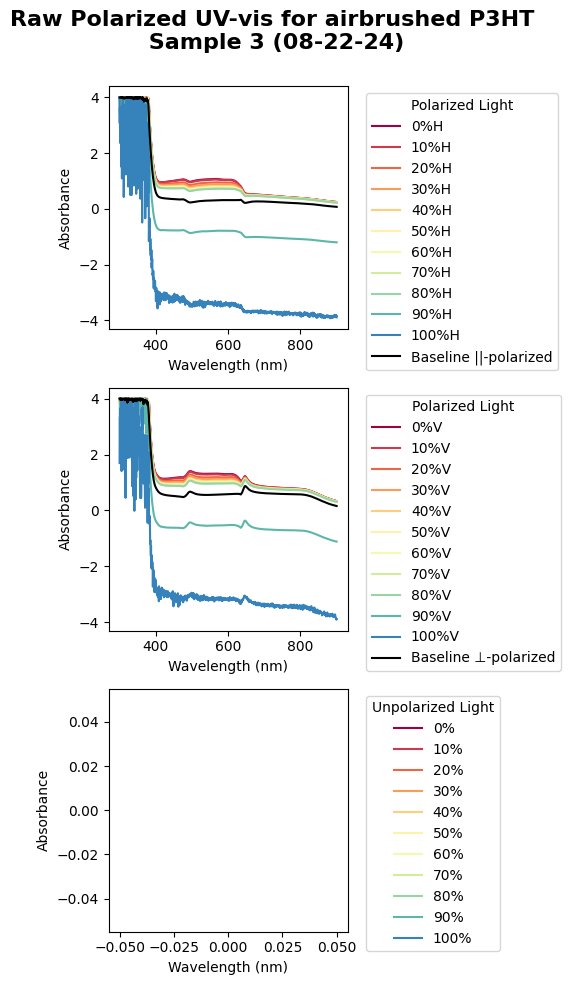

In [110]:
##### plotting the raw data #####
fig,axs = plot_polarized_UVvis(raw_df, bw=None, ylim=(None),title=f'Raw Polarized UV-vis for {method_str} {material_str}\n Sample {s_num} ({date_str})\n')
axs[0].plot(raw_df['Wavelength'], raw_df['H_baseline'], label="Baseline ||-polarized", color='k')
axs[1].plot(raw_df['Wavelength'], raw_df['V_baseline'], label="Baseline ⊥-polarized", color='k')
axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

save_str = f"Raw_Polarized_UVvis_S{s_num}_{method_str}_P3HT_{date_str}.pdf"
fig.savefig(save_str, format='pdf')
print(f"Saved figure to {save_str}")

In [111]:
#### baseline correction ####
# formula = r"$A_{\text{corrected}} = A_{\text{raw}} - A_{\text{baseline}}$"

df_corrected = raw_df.copy()
for i, column in enumerate([col for col in df_corrected.columns if 'H' in col and 'baseline' not in col]):
    df_corrected[column] = raw_df[column].values - raw_df['H_baseline'].values

for i, column in enumerate([col for col in df_corrected.columns if 'V' in col and 'baseline' not in col]):
    df_corrected[column] = raw_df[column].values - raw_df['V_baseline'].values

df_normalized = df_corrected.copy

max0= max(df_corrected['0%'])
max0H = max(df_corrected['0%H'])
max0V = max(df_corrected['0%V'])

print("max0strain= " , max0V)


max0strain=  0.760144


In [112]:
df_normalized = df_corrected.copy()

max0= max(df_corrected['0%'])
max0H = max(df_corrected['0%H'])
max0V = max(df_corrected['0%V'])

for i, column in enumerate([col for col in df_corrected.columns if 'H' in col and 'baseline' not in col]):
    df_normalized[column] = df_corrected[column].values / max0H

for i, column in enumerate([col for col in df_corrected.columns if 'V' in col and 'baseline' not in col]):
    df_normalized[column] = df_corrected[column].values / max0V

for i, column in enumerate([col for col in df_corrected.columns if 'V' not in col and 'H' not in col and 'baseline' not in col and 'Wavelength' not in col]):
    df_normalized[column] = df_corrected[column].values / max0

df_normalized

,Wavelength,0%,10%,20%,30%,40%,50%,60%,70%,80%,...,30%V,40%V,50%V,60%V,70%V,80%V,90%V,100%V,V_baseline,H_baseline
0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,-0.027809,-0.057786,-0.138666,0.000000,-0.726954,0.000000,-3.032453,4.000000,4.000000
1,300.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.006658,-0.048544,-0.059710,0.034597,-0.019928,-0.576060,-0.053128,-0.884738,3.973701,4.000000
2,301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.007348,-0.078153,-0.277565,-0.067221,-0.222032,-0.425696,-0.512530,-0.803663,3.994414,3.992867
3,301.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.025979,-0.035956,-0.041860,0.025315,-0.134214,-0.437476,-0.156023,-2.646606,3.980757,3.989014
4,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.007633,-0.047627,-0.079298,-0.028710,-0.183088,-0.533855,-0.372953,-0.452345,4.000000,3.992784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.222179,0.211173,0.203344,0.198077,0.199342,0.193744,-1.674624,-5.321133,0.165349,0.072880
1197,898.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.222592,0.211636,0.203758,0.198565,0.199674,0.193189,-1.674653,-5.340579,0.163506,0.072257
1198,899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.223745,0.212738,0.205007,0.199771,0.200823,0.193504,-1.673443,-5.300422,0.161557,0.071873
1199,899.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.223752,0.212832,0.205040,0.199949,0.201011,0.193517,-1.672941,-5.343403,0.159992,0.071622


Saved figure to Corrected_Polarized_UVvis_S3_airbrushed_P3HT_08-22-24.pdf


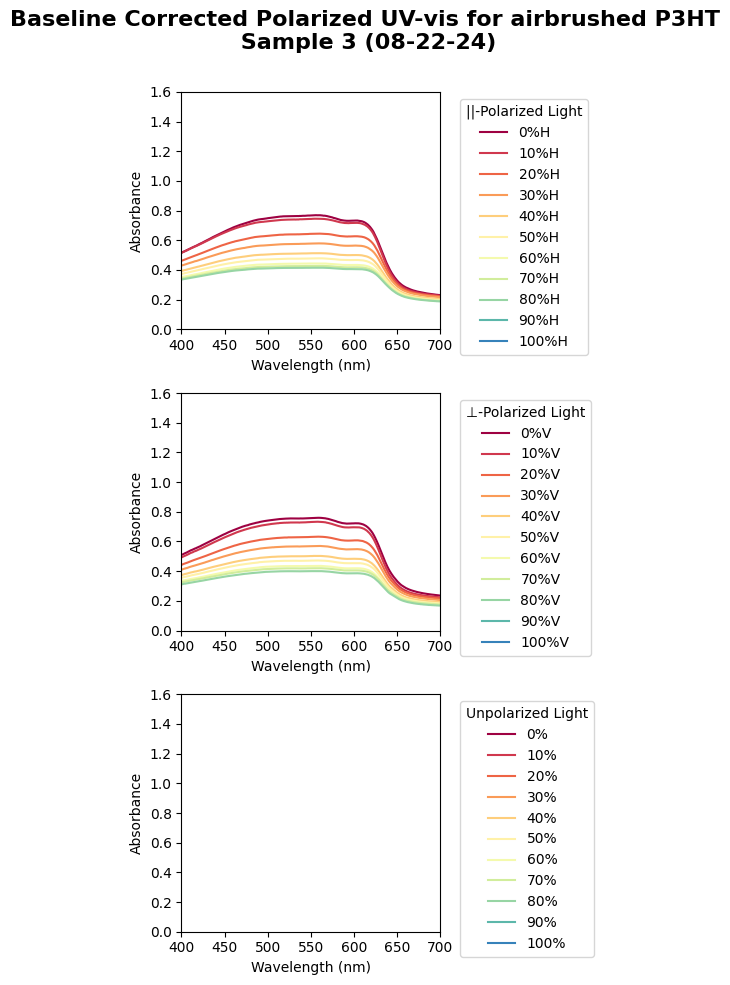

In [113]:
##### plotting final corected #####
fig,axs = plot_polarized_UVvis(df_corrected, title=f'Baseline Corrected Polarized UV-vis for {method_str} {material_str}\n Sample {s_num} ({date_str})\n', bw=(400,700), ylim = (0,1.6), plot_transmittance=False)
# axs[0].text(0.75, 0.9, formula, fontsize=12, ha='center', va='center', transform=axs[0].transAxes)

# #plot overides
# axs[0].plot(df_corrected['Wavelength'], df_corrected['H_baseline'], label="Baseline ||-polarized", color='k')
# axs[1].plot(df_corrected['Wavelength'], df_corrected['V_baseline'], label="Baseline ⊥-polarized", color='k')
# axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')
# axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')
# axs[2].set_ylim((.4,.8))

save_str = f"Corrected_Polarized_UVvis_S{s_num}_{method_str}_P3HT_{date_str}.pdf"
fig.savefig(save_str, format='pdf')
print(f"Saved figure to {save_str}")

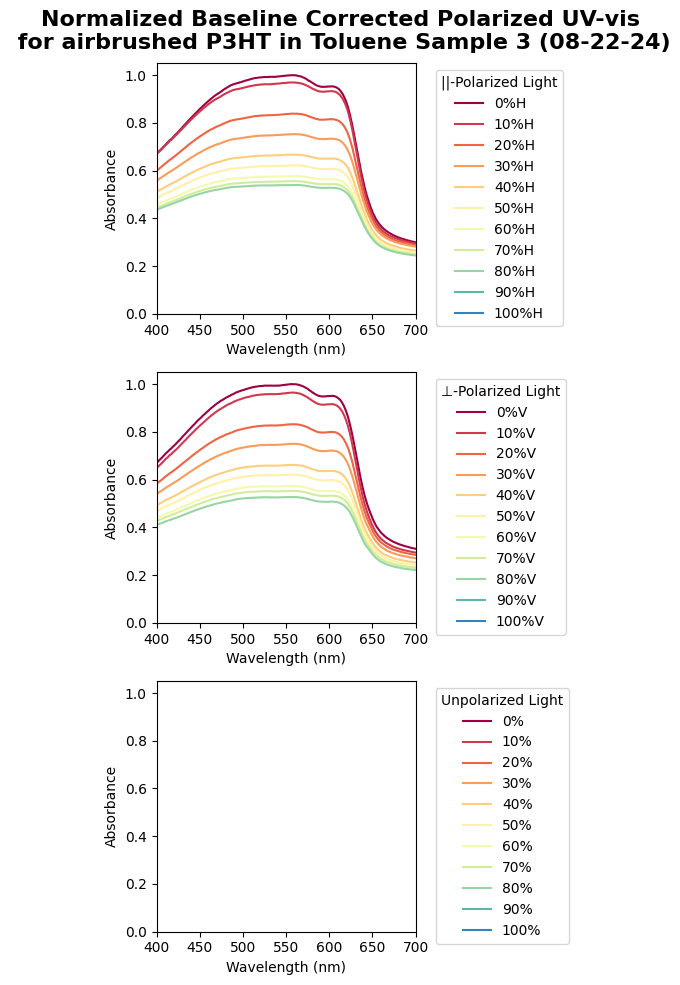

In [114]:
fig,axs = plot_polarized_UVvis(df_normalized, title=f'Normalized Baseline Corrected Polarized UV-vis\n for {method_str} {material_str} in {solvent_str} Sample {s_num} ({date_str})', bw=(400,700), ylim = (0,1.05), plot_transmittance=False)


In [115]:
#Save corrected data
data_save_str = f"Corrected_Polarized_UVvis_S{s_num}_{method_str}_P3HT_{date_str}.csv"
df_corrected.to_csv(data_save_str, index=False)

### Calculate the absorbance ratio

In [116]:
#load from file for modularity
peak00 = 606
peak01 = 557

df_absorbance_ratios = pd.DataFrame()

for i, sample in enumerate(sample_info):
    print(sample)
    
    data_save_str = f"Corrected_Polarized_UVvis_S{sample['s_num']}_{sample['method_str']}_P3HT_{sample['date_str']}.csv"
    df_corrected = pd.read_csv(data_save_str)
    # Get absorbance data for the peaks
    A00 = df_corrected[df_corrected['Wavelength'] == peak00]
    A01 = df_corrected[df_corrected['Wavelength'] == peak01]

    data_cols = [col for col in df_corrected.columns if col not in ['Wavelength', 'V_baseline', 'H_baseline']]    # Filter out the unwanted columns
    absorbance_ratio = A00[data_cols].values / A01[data_cols].values     # Calculate the absorbance ratio

    df_absorbance_ratio = pd.DataFrame(absorbance_ratio, columns=data_cols)
    df_absorbance_ratios = pd.concat([df_absorbance_ratios, df_absorbance_ratio], ignore_index=True)

    H_columns_str = [col for col in A00.columns if 'H' in col and 'baseline' not in col]
    V_columns_str = [col for col in A00.columns if 'V' in col and 'baseline' not in col]

    # print(H_columns_str, V_columns_str)
    # df.dichroic_ratio = A00[H_columns_str].values / A00[V_columns_str].values
    # df.dichroic_ratio

{'file_path': ['Batch 6 6 - Sample 1 Unpolarized Data 9-10-24.csv', 'Batch 6 6 - Sample 1 Horizontal Data 9-10-24.csv', 'Batch 6 6 - Sample 1 Vertical Data  9-10-24.csv'], 's_num': 1, 'date_str': '2024-9-10', 'method_str': 'airbrushed', 'material_str': 'P3HT', 'solvent_str': 'Toluene'}
{'file_path': ['/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Unpolarized 1.csv', '/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Horizontal 1.csv', '/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Vertical 1.csv'], 's_num': 2, 'date_str': '08-22-24', 'method_str': 'airbrushed', 'material_str': 'P3HT', 'solvent_str': 'Toluene'}
{'file_path': ['/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Unpolarized 2.csv', '/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Horizontal 2.csv', '/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/P

In [117]:
absorbance_ratios_data_save_str = f"Absorbance_Ratios_UVvis_S{s_num}_{method_str}_{solvent_str}_P3HT_{date_str}.csv"
df_absorbance_ratios.to_csv(absorbance_ratios_data_save_str, index=False)
print(f"Saved to Absorbance Ratio data to {absorbance_ratios_data_save_str}")

Saved to Absorbance Ratio data to Absorbance_Ratios_UVvis_S3_airbrushed_Toluene_P3HT_08-22-24.csv


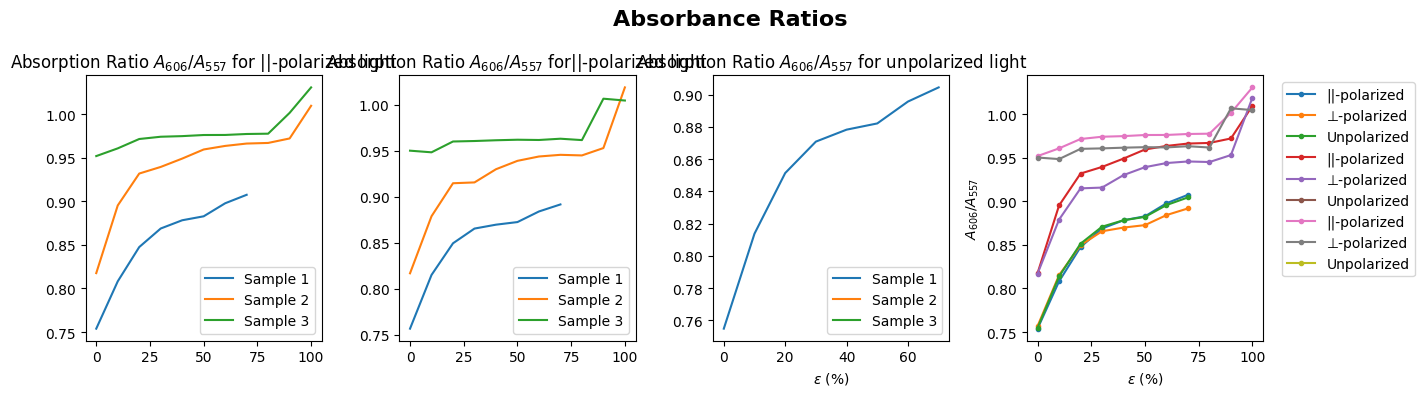

In [118]:
fig, axs = plt.subplots(1, 4, figsize=(14, 4))
fig.suptitle("Absorbance Ratios", fontsize=16, fontweight='bold')

# Loop through each row in the DataFrame (i.e., each sample)
for i, row in df_absorbance_ratios.iterrows():
    # Find the columns with 'H' and without 'baseline'
    H_columns_str = [col for col in df_absorbance_ratios.columns if 'H' in col and 'baseline' not in col]
    H_percents = [float(s.strip('%HV')) for s in H_columns_str]
    axs[0].plot(H_percents, row[H_columns_str], label=f"Sample {sample_info[i]['s_num']}")

    V_columns_str = [col for col in df_absorbance_ratios.columns if 'V' in col and 'baseline' not in col]
    V_percents = [float(s.strip('%HV')) for s in V_columns_str]
    axs[1].plot(V_percents, row[V_columns_str], label=f"Sample {sample_info[i]['s_num']}")

    unpolarized_columns_str = [col for col in df_corrected.columns if 'V' not in col and 'H' not in col and 'baseline' not in col and 'Wavelength' not in col]
    unpolaraized_percents = [float(s.strip('%HV')) for s in H_columns_str]
    axs[2].plot(unpolaraized_percents, row[unpolarized_columns_str], label=f"Sample {sample_info[i]['s_num']}")

    axs[3].plot(H_percents, row[H_columns_str], '.-',label=f"||-polarized")
    axs[3].plot(V_percents, row[V_columns_str], '.-', label=f"⊥-polarized")
    axs[3].plot(unpolaraized_percents, row[unpolarized_columns_str], '.-',label=f"Unpolarized")

    
# Add legend and show plot
axs[0].set_title(rf'Absorption Ratio $A_{{606}}/A_{{557}}$ for ||-polarized light')
axs[1].set_title(rf'Absorption Ratio $A_{{606}}/A_{{557}}$ for||-polarized light')
axs[2].set_title(rf'Absorption Ratio $A_{{606}}/A_{{557}}$ for unpolarized light')
axs[2].set_xlabel(r'$\epsilon$ (%)')
# axs[0].set_title(f'Dichroic Ratio $A_{{||}}/A_{{\perp}}$ for ||-polarized light')

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

axs[3].set_ylabel(rf'$A_{{606}}/A_{{557}}$')
axs[3].set_xlabel(rf'$\epsilon$ (%)')

fig.tight_layout()

In [119]:
### Dichroic Ratios ###
#todo

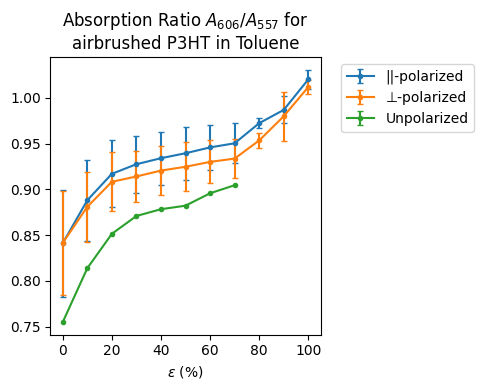

In [122]:
# Compute the mean and standard error for each column
mean_values = df_absorbance_ratios.mean()
standard_error = df_absorbance_ratios.sem()

H_columns_str = [col for col in df_absorbance_ratios.columns if 'H' in col and 'baseline' not in col]
H_percents = [float(s.strip('%HV')) for s in H_columns_str]

V_columns_str = [col for col in df_absorbance_ratios.columns if 'V' in col and 'baseline' not in col]
V_percents = [float(s.strip('%HV')) for s in V_columns_str]

unpolarized_columns_str = [col for col in df_corrected.columns if 'V' not in col and 'H' not in col and 'baseline' not in col and 'Wavelength' not in col]
unpolaraized_percents = [float(s.strip('%HV')) for s in H_columns_str]

# Plot the mean values with error bars for standard error
fig, axs = plt.subplots(1, 1, figsize=(5, 4))

axs.errorbar(H_percents, mean_values[H_columns_str], yerr=standard_error[H_columns_str], fmt='.-', label='||-polarized', capsize=2, capthick=1)
axs.errorbar(V_percents, mean_values[V_columns_str], yerr=standard_error[V_columns_str], fmt='.-', label='⊥-polarized',  capsize=2, capthick=1)
axs.errorbar(unpolaraized_percents, mean_values[unpolarized_columns_str], yerr=standard_error[unpolarized_columns_str], fmt='.-', label='Unpolarized', capsize=2, capthick=1)

# Customize plot
axs.set_title(f'Absorption Ratio $A_{{606}}/A_{{557}}$ for\n{method_str} P3HT in {solvent_str}')
axs.set_xlabel(r'$\epsilon$ (%)')
axs.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
# axs.grid('on')